## 4.7 계단 오르내리기 예제

계단 오르내리기를 1,000번 수행하는 코드

In [5]:
# python 내장 random 모듈
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps) :
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

[그림 4-4] 처음 100회의 계단 오르내리기

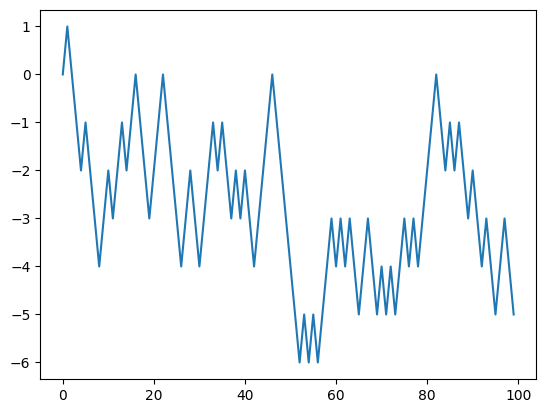

In [8]:
plt.plot(walk[:100])

**walk** : 계단을 오르거나(+1) 내려간(-1) 값의 누적합

**np.random**모듈을 사용해서 1,000번 수행한 결과(1, -1)를 한 번에 저장하고 누적합을 계산



In [12]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

계단을 오르내린 위치의 최솟값과 최댓값

In [13]:
walk.min()

-2

In [14]:
walk.max()

37

계단의 처음 위치에서 최초로 10칸 떨어지기까지 얼마나 걸렸는지 확인

In [16]:
# argmax의 최대값 : True
(np.abs(walk) >= 10).argmax()

59

### 4.7.1 한 번에 시뮬레이션

계단 오르내리기를 많은 횟수(대략 5,000회 정도) 시뮬레이션

* numpy.random 함수에 크기가 2인 튶플을 넘기면 2차원 배열이 생성되고 각 컬럼에서 누적합을 구해서 5,000회의 시뮬레이션을 한 방에 처리할 수 있다.



In [17]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 또는 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,  -1, ..., -22, -23, -22],
       [  1,   0,   1, ...,  16,  15,  16],
       [ -1,   0,   1, ...,   2,   1,   0],
       ...,
       [ -1,  -2,  -3, ...,   4,   5,   6],
       [ -1,  -2,  -3, ...,  -8,  -9, -10],
       [ -1,  -2,  -1, ..., -42, -41, -42]])

In [18]:
walks.max()

118

In [20]:
walks.min()

-114

In [21]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ..., False, False,  True])

In [23]:
hits30.sum() # 누적합이 30 또는 -30이 되는 경우의 수

3360

In [24]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

497.3309523809524

In [25]:
steps = np.random.normal(loc = 0, scale =0.25,
                         size = (nwalks, nsteps))